In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/run_history.csv')

In [ ]:
!pip install matplotlib seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
max_data = data.loc[data.groupby('learning_rate')['validation_accuracy'].idxmax()]

In [ ]:
max_data=max_data[max_data['learning_rate']!=0.000015]

In [ ]:
max_data.head(100)

,Unnamed: 0,model_name,learning_rate,epochs,validation_accuracy,classification_report
106,106,bert-base-uncased,0.000002,Epoch 1/30,0.473684,precision recall f1-score ...
22,22,bert-base-uncased,0.000010,Epoch 3/4,0.526316,precision recall f1-score ...
66,66,bert-base-uncased,0.000012,Epoch 25/100,0.578947,precision recall f1-score ...
181,181,bert-base-uncased,0.000012,Epoch 12/30,0.526316,precision recall f1-score ...
201,201,bert-base-uncased,0.000013,Epoch 2/30,0.526316,precision recall f1-score ...
230,230,bert-base-uncased,0.000013,Epoch 1/30,0.473684,precision recall f1-score ...
82,82,bert-base-uncased,0.000017,Epoch 7/30,0.578947,precision recall f1-score ...
8,8,bert-base-uncased,0.000020,Epoch 1/4,0.526316,precision recall f1-score ...
4,4,bert-base-uncased,0.000025,Epoch 1/4,0.421053,precision recall f1-score ...
0,0,bert-base-uncased,0.000030,Epoch 1/4,0.526316,precision recall f1-score ...


<Axes: xlabel='learning_rate', ylabel='validation_accuracy'>

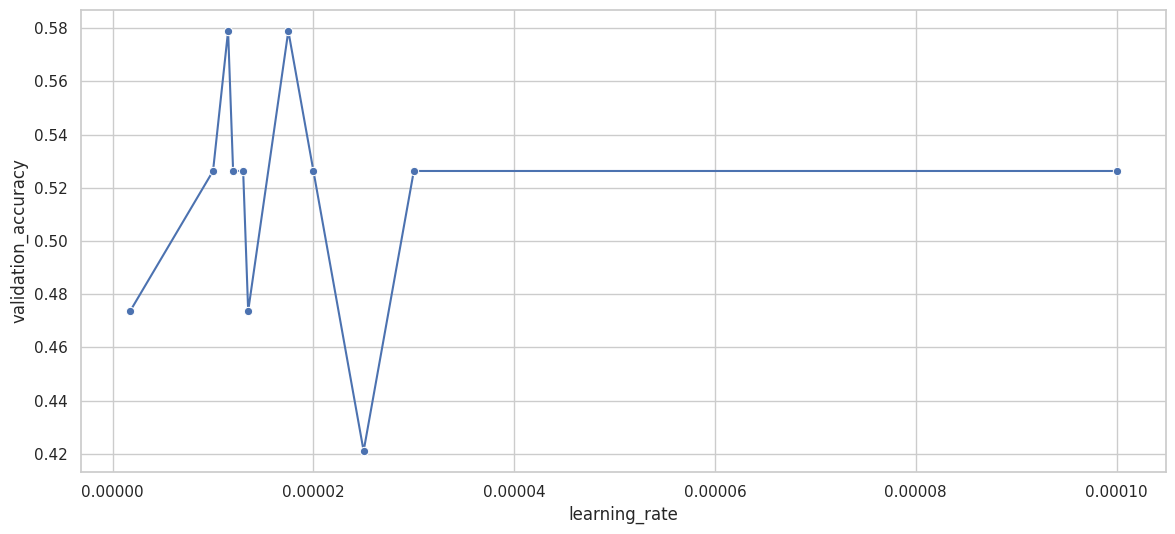

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Line plot
sns.lineplot(data=max_data, x='learning_rate', y='validation_accuracy', marker='o')

In [ ]:
itr_data=data[data['learning_rate']==0.0000115]

In [ ]:
itr_data[:10]

,Unnamed: 0,model_name,learning_rate,epochs,validation_accuracy,classification_report
32,32,bert-base-uncased,0.000012,Epoch 1/10,0.421053,precision recall f1-score ...
33,33,bert-base-uncased,0.000012,Epoch 2/10,0.421053,precision recall f1-score ...
34,34,bert-base-uncased,0.000012,Epoch 3/10,0.368421,precision recall f1-score ...
35,35,bert-base-uncased,0.000012,Epoch 4/10,0.421053,precision recall f1-score ...
36,36,bert-base-uncased,0.000012,Epoch 5/10,0.368421,precision recall f1-score ...
37,37,bert-base-uncased,0.000012,Epoch 6/10,0.368421,precision recall f1-score ...
38,38,bert-base-uncased,0.000012,Epoch 7/10,0.421053,precision recall f1-score ...
39,39,bert-base-uncased,0.000012,Epoch 8/10,0.473684,precision recall f1-score ...
40,40,bert-base-uncased,0.000012,Epoch 9/10,0.473684,precision recall f1-score ...
41,41,bert-base-uncased,0.000012,Epoch 10/10,0.368421,precision recall f1-score ...


<Axes: xlabel='epochs', ylabel='validation_accuracy'>

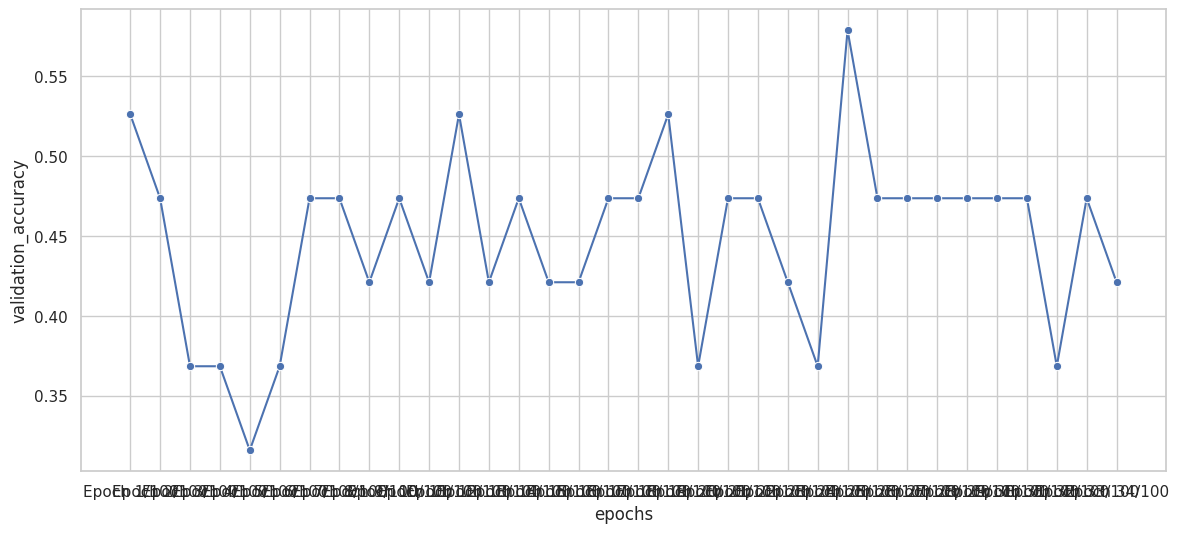

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Line plot
sns.lineplot(data=itr_data[10:], x='epochs', y='validation_accuracy', marker='o')

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')

In [ ]:
nltk.download('wordnet')

In [ ]:
stop_words=stopwords.words('english')
lemmatizer=WordNetLemmatizer()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/reports_complete.csv')

In [ ]:
df.dtypes

file_application_number    object
case_filing_date           object
case_category_name_en      object
judgement                  object
judgement_result            int64
case_stage_id               int64
dtype: object

In [ ]:
def data_preprocessing(judgement):
    # data cleaning
    judgement = re.sub(re.compile('<.*?>'), '', judgement) #removing html tags
    judgement =  re.sub('[^A-Za-z0-9]+', ' ', judgement) #taking only words

    # lowercase
    judgement = judgement.lower()

    # tokenization
    tokens = nltk.word_tokenize(judgement) # converts review to tokens

    # stop_words removal
    judgement = [word for word in tokens if word not in stop_words] #removing stop words

    # lemmatization
    judgement = [lemmatizer.lemmatize(word) for word in judgement]

    # join words in preprocessed review
    judgement = ' '.join(judgement)

    return judgement

In [ ]:
df['preprocessed_judgement']=df['judgement'].apply(lambda judgement: data_preprocessing(judgement))

In [ ]:
from nltk.text import TextCollection

def vectorize(corpus):
    corpus = [tokenize(doc) for doc in corpus]
    texts  = TextCollection(corpus)

    for doc in corpus:
        yield {
            term: texts.tf_idf(term, doc)
            for term in doc
        }

In [ ]:
df['vector'] = df['preprocessed_judgement'].apply(lambda text: vectorize(text))

In [ ]:
df['vector'].head()

0    <generator object vectorize at 0x7a7eed1395b0>
1    <generator object vectorize at 0x7a7eed139700>
2    <generator object vectorize at 0x7a7eed139850>
3    <generator object vectorize at 0x7a7eed139770>
4    <generator object vectorize at 0x7a7eed1397e0>
Name: vector, dtype: object

In [ ]:
df=df[df['judgement_result'] !=2]

In [ ]:
count_class_1,count_class_0=df.judgement_result.value_counts()

df_class_1=df[df['judgement_result']==1]
df_class_0=df[df['judgement_result']==0]

In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
#df_class_0_over = df_class_0.sample(1000, replace=True)
#df_class_1_over = df_class_1.sample(1000, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.judgement_result.value_counts())

Random over-sampling:
judgement_result
1    129
0    129
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_test_over['preprocessed_judgement'], df_test_over['judgement_result'], test_size=0.3, random_state=42, stratify=df_test_over['judgement_result'])

In [ ]:
print(y_train.value_counts())

judgement_result
1    90
0    90
Name: count, dtype: int64


In [ ]:
print(y_test.value_counts())

judgement_result
0    39
1    39
Name: count, dtype: int64


In [ ]:
train_texts=X_train.tolist()
val_texts=X_test.tolist()
train_labels=y_train.tolist()
val_labels=y_test.tolist()

In [ ]:
print(train_labels,val_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1]


In [ ]:
df.head(100)

,text
0,This is the first document.
1,This is the second document.
2,And this is the third one.


In [ ]:
df['judgement'].head()

0    DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...
1    DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...
2    DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...
3    DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...
4    DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...
Name: judgement, dtype: object

In [ ]:
# from transformers import BertTokenizer, BertModel
# import torch

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# def preprocess(text):
#     return tokenizer(text, padding=True, truncation=True, return_tensors='pt')

# def get_features(texts):
#     features = []
#     for text in texts:
#         inputs = preprocess(text)
#         with torch.no_grad():
#             outputs = model(**inputs)
#         # Use the outputs as features (e.g., take the [CLS] token's embedding)
#         cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze()
#         features.append(cls_embedding)
#     return features

# texts = df['judgement'].tolist()
# features = get_features(texts)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
 !pip install huggingface_hub

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: read).

In [ ]:
import pandas as pd
import numpy as np
from transformers import DistilBertTokenizer, DistilBertModel, DistilBertConfig
import torch

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Load tokenizer and model with configuration to output hidden states
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
config = DistilBertConfig.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english', output_hidden_states=True)
model = DistilBertModel.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english', config=config).to(device)

# Preprocess function
def preprocess(text):
    return tokenizer(text, padding=True, truncation=True, return_tensors='pt')

# Feature extraction function
def get_features(texts):
    features = []
    for text in texts:
        inputs = preprocess(text).to(device)  # Move inputs to GPU
        with torch.no_grad():
            outputs = model(**inputs)
        # Use the hidden states as features
        hidden_states = outputs.hidden_states[-1]  # Get the last hidden state
        cls_embedding = hidden_states[:, 0, :].squeeze()  # Use the [CLS] token's embedding
        features.append(cls_embedding.cpu().numpy())  # Convert to numpy array and move to CPU
    return features

# Extract features
texts = df['judgement'].tolist()
features = get_features(texts)

# Add features to DataFrame
df['features'] = features

# Convert features to numpy array
features_np = np.array(df['features'].tolist())

# Add features back to the DataFrame
df['features'] = features_np.tolist()

# Save the DataFrame to a file (e.g., CSV or JSON)
df.to_csv('text_features_ditillbert.csv', index=False)

In [ ]:
# import numpy as np

# # Convert features to numpy array for saving or further processing
# features_np = np.array([feature.numpy() for feature in features])

# # Add features back to the DataFrame
# df['features'] = features_np.tolist()

# # Save the DataFrame to a file (e.g., CSV or JSON)
# df.to_csv('text_features.csv', index=False)

In [ ]:
#!pip install -q transformers datasets
#!pip install accelerate -U
#!pip install transformers[torch]
#!pip install umap-learn
#!pip install -U imbalanced-learn
#!pip3 install Cython

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F


#from umap import UMAP
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#import datasets
#from datasets import Dataset, DatasetDict
#from datasets import load_dataset

from transformers import AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer
from transformers import Trainer

In [ ]:
from imblearn.datasets import make_imbalance
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [ ]:
from transformers import AutoTokenizer
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [ ]:
texts=df_test_over['preprocessed_judgement'].tolist()
label=df_test_over['judgement_result'].tolist()

In [ ]:
class TextClassificationDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
  def __len__(self):
        return len(self.texts)
  def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {'input_ids': encoding['input_ids'][0],  # Access the first (and only) sentence
                'attention_mask': encoding['attention_mask'][0],
                'label': torch.tensor(label)}

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

In [ ]:
def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    return accuracy_score(actual_labels, predictions), classification_report(actual_labels, predictions)

In [ ]:
'''
def predict_sentiment(text, model, tokenizer, device, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)
        return "positive" if preds.item() == 1 else "negative"
'''

In [ ]:
# Set up parameters
bert_model_name = 'bert-base-uncased'
num_classes = 2
 # Find the length of each string in the column
#df['string_length'] = df['preprocessed_judgement'].apply(len)

# Find the maximum length
max_length = 512 #df['string_length'].max()
batch_size = 5
num_epochs = 30
learning_rate = 1.5e-5

In [ ]:
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier(bert_model_name, num_classes).to(device)

In [ ]:
optimizer = AdamW(model.parameters(), lr=learning_rate, betas=(9e-7,9e-4))
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
print(train_dataloader)

In [ ]:
tokenizer.model_max_length

512

In [ ]:
def capture_run_info(model_name, learning_rate, epochs, validation_accuracy, classification_report):
  """
  This function captures information from a single model run.

  Args:
      model_name: Name of the pre-trained model used.
      learning_rate: Learning rate used for training.
      epochs: Number of epochs for training.
      validation_accuracy: Validation accuracy achieved.
      classification_report: Classification report from the evaluation.

  Returns:
      A dictionary containing the captured information.
  """
  run_info = {
      "model_name": model_name,
      "learning_rate": learning_rate,
      "epochs": epochs,
      "validation_accuracy": validation_accuracy,
      "classification_report": classification_report
  }
  return pd.DataFrame([run_info])

In [ ]:
# Create an empty DataFrame with appropriate column names
#run_history = pd.DataFrame(columns=["model_name", "learning_rate", "epochs", "validation_accuracy", "classification_report"])
run_history = pd.read_csv('/content/drive/MyDrive/run_history.csv')

In [ ]:
for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        epochs=f"Epoch {epoch + 1}/{num_epochs}"
        train(model, train_dataloader, optimizer, scheduler, device)
        accuracy, report = evaluate(model, val_dataloader, device)
        print(f"Validation Accuracy: {accuracy:.4f}")
        print(report)
        run_info = capture_run_info(bert_model_name, learning_rate, epochs, accuracy, report)
        run_history = pd.concat([run_history, run_info])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        39
           1       0.00      0.00      0.00        39

    accuracy                           0.50        78
   macro avg       0.25      0.50      0.33        78
weighted avg       0.25      0.50      0.33        78

Epoch 2/30


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        39
           1       0.00      0.00      0.00        39

    accuracy                           0.50        78
   macro avg       0.25      0.50      0.33        78
weighted avg       0.25      0.50      0.33        78

Epoch 3/30
Validation Accuracy: 0.7308
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        39
           1       0.74      0.72      0.73        39

    accuracy                           0.73        78
   macro avg       0.73      0.73      0.73        78
weighted avg       0.73      0.73      0.73        78

Epoch 4/30
Validation Accuracy: 0.6154
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        39
           1       1.00      0.23      0.38        39

    accuracy                           0.62        78
   macro avg       0.7

In [ ]:
print(y_train.value_counts(),y_test.value_counts())

judgement_result
1    90
0    90
Name: count, dtype: int64 judgement_result
0    39
1    39
Name: count, dtype: int64


In [ ]:
run_history=run_history.drop('Unnamed: 0',axis=1)

In [ ]:
run_history.head()

,model_name,learning_rate,epochs,validation_accuracy,classification_report
0,bert-base-uncased,0.000030,Epoch 1/4,0.526316,precision recall f1-score ...
1,bert-base-uncased,0.000030,Epoch 2/4,0.473684,precision recall f1-score ...
2,bert-base-uncased,0.000030,Epoch 3/4,0.473684,precision recall f1-score ...
3,bert-base-uncased,0.000030,Epoch 4/4,0.473684,precision recall f1-score ...
4,bert-base-uncased,0.000025,Epoch 1/4,0.421053,precision recall f1-score ...


In [ ]:
run_history.to_csv('/content/drive/MyDrive/run_history.csv')

In [ ]:
run_history.head()

,model_name,learning_rate,epochs,validation_accuracy,classification_report
0,bert-base-uncased,0.000030,Epoch 1/4,0.526316,precision recall f1-score ...
1,bert-base-uncased,0.000030,Epoch 2/4,0.473684,precision recall f1-score ...
2,bert-base-uncased,0.000030,Epoch 3/4,0.473684,precision recall f1-score ...
3,bert-base-uncased,0.000030,Epoch 4/4,0.473684,precision recall f1-score ...
4,bert-base-uncased,0.000025,Epoch 1/4,0.421053,precision recall f1-score ...


In [ ]:
max=run_history['validation_accuracy'].max()
run_history[run_history['validation_accuracy']==max]

,model_name,learning_rate,epochs,validation_accuracy,classification_report
0,bert-base-uncased,0.000015,Epoch 10/30,0.724138,precision recall f1-score ...
0,bert-base-uncased,0.000015,Epoch 11/30,0.724138,precision recall f1-score ...
0,bert-base-uncased,0.000015,Epoch 12/30,0.724138,precision recall f1-score ...
0,bert-base-uncased,0.000015,Epoch 14/30,0.724138,precision recall f1-score ...
